<a href="https://colab.research.google.com/github/Srividhyak2011/Demo-Datascienceproject/blob/main/Copy_of_Copy_of_M3_MP1_NB_Essential_Genes_Final_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project 01: Prediction of Essential Genes from Networks

## Learning Objectives

At the end of the mini project, you will be able to -

* Get an understanding of the dataset.
* Build and analyze Networks (or Graphs)
* Extract features from the network
* Predict Essential Genes using the classification algorithm

## Information

### Background of the project

This Mini-Project is based on the research work based out of Robert Bosch Center for Data Science and Artificial Intelligence (RBCDSAI) at IIT Madras. More details can be found in this article [https://doi.org/10.3389/fgene.2021.722198](https://www.frontiersin.org/articles/10.3389/fgene.2021.722198/full).

The goal of this project is to apply machine learning to predict Essential Genes using the Protein network as the features of the STRING dataset.

### About the paper cited above

Features Used in the Paper

267 Genetic Featues + 16 Network Centrality features.

12 Centralities [1 to 12] + 4 other Auxillary network metrics

These features are computed from the graph. Once extracted, they translate the Omics-Data into a typical machine learning data, which can be further developed with Machine learning Models.


### About the Dataset

The dataset will be directly downloaded from the [String Database](https://string-db.org/cgi/download) , in a very convenient manner. 
We are downloading and working on the bacterium *Actinomyces coleocanis* as it is a small dataset suitable for the runtime and quick reruns.
[Actinomyces coleocanis](https://stringdb-static.org/download/protein.links.v11.5/525245.protein.links.v11.5.txt.gz) will be downloaded and unzipped. The text file contains 3 columns - protein1, protein2 and score.
This 3 column data is a graph data.

The Netgenes contains essential gene predictions for 2,700+ bacteria predicted using features derived from STRING protein–protein functional association networks. It contains a re fined version to access and download the data with some information as well. The dataset contains the essential genes for each bacteria. 
Clicking on the specific bacteria name will navigate to an interactive
page. 
[Netgenes Database](https://rbc-dsai-iitm.github.io/NetGenes/)


### Small note on Proteins

Proteins are large, complex molecules that play many critical roles in the body. They are necessary for building the structural components of the human body, such as muscles and organs. Proteins also determine how the organism looks, how well its body metabolises food or fights infection and sometimes even how it behaves. Proteins are chains of chemical building blocks called amino acids. A protein may contain a few amino acids or it could have several thousands.



### Small note on Genes

A gene is a basic unit of heredity in a living organism that normally resides in long strands of DNA called chromosomes. Genes are coded instructions that decide what the organism is like, how it behaves in its environment and how it survives. They hold the information to build and maintain an organism’s cells and pass genetic traits to offspring. A gene consists of a long combination of four different nucleotide bases namely adenine, cytosine, guanine and thymine.


### Relationship between GENES and PROTEINS
Gene and protein are two functionally-related entities found in the cell of an living organism.
Most genes contain the information require to make proteins. Please note Gene is not a part of Protein and vice-versa.
For more information, click [Here](https://pediaa.com/difference-between-gene-and-protein/).




### Importance of Essential Genes
Essential genes are genes required for a cell or an organism to survive. Some of the functinalities are cell growth and metabolism, cell reproduction, its well-being etc. Disruption or deletion of such genes causes cell death, indicating that these genes perform essential biological functions. A majority of the Genes in an organism are NON-ESSENTIAL. Only a small fraction are Essential.

**Python Packages used:**  
* [`networkx`](https://networkx.org/documentation/stable/_downloads/networkx_reference.pdf) for graph analysis
* [`requests`](https://docs.python-requests.org/en/latest/) for fetching data over the internet 
* [`Pandas`](https://pandas.pydata.org/docs/reference/index.html) for data frames and easy to read csv files  
* [`Numpy`](https://numpy.org/doc/stable/reference/index.html#reference) for array and matrix mathematics functions  
* [`sklearn`](https://scikit-learn.org/stable/user_guide.html) for the metrics and pre-processing
* [`seaborn`](https://seaborn.pydata.org/) and [`matplotlib`](https://matplotlib.org/) for plotting


In [1]:
#@title Download dataset
%%capture
!gdown "1SjpKNyYWqpEs3JwXF_cTF3980ZtZOld9"
!unzip "Essential genes data.zip"

In [2]:
!pip install networkx==2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


## Importing the packages

In [3]:
### The required libraries and packages ###
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import Counter
from operator import itemgetter
from google.colab import drive
import os
from tqdm import tqdm
import time
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import networkx as nx

## Importing the Data

In [4]:
df_raw = pd.read_csv('525245.protein.links.v11.5.txt', sep = '\s',engine = "python")
print(df_raw.shape)
df_raw.head()

(213398, 3)


,protein1,protein2,combined_score
0,525245.HMPREF0044_0001,525245.HMPREF0044_1430,635
1,525245.HMPREF0044_0001,525245.HMPREF0044_1224,170
2,525245.HMPREF0044_0001,525245.HMPREF0044_0084,164
3,525245.HMPREF0044_0001,525245.HMPREF0044_0281,165
4,525245.HMPREF0044_0001,525245.HMPREF0044_0968,165


In [5]:
df = df_raw.copy()
df.head()

,protein1,protein2,combined_score
0,525245.HMPREF0044_0001,525245.HMPREF0044_1430,635
1,525245.HMPREF0044_0001,525245.HMPREF0044_1224,170
2,525245.HMPREF0044_0001,525245.HMPREF0044_0084,164
3,525245.HMPREF0044_0001,525245.HMPREF0044_0281,165
4,525245.HMPREF0044_0001,525245.HMPREF0044_0968,165


In [6]:
print(f"df.shape = {df.shape}")
n_uniq_protein1 = df["protein1"].nunique()
n_uniq_protein2 = df["protein2"].nunique()
print(f"n_uniq_protein1 = {n_uniq_protein1}, n_uniq_protein2 = {n_uniq_protein2}")

df.nunique()

df.shape = (213398, 3)
n_uniq_protein1 = 1530, n_uniq_protein2 = 1530


protein1          1530
protein2          1530
combined_score     850
dtype: int64

In [7]:
df.isnull().sum()

protein1          0
protein2          0
combined_score    0
dtype: int64

## Graded Exercises (10 points)

Exercises 1 to 4 deal with the data, the graph structure, its visualization and data preparation of **FEATURES** only.

Exercises 5 deals with linking the Feature data with the target data 

Exercise 6 deals with the classification model.

### Exercise 1 (1 point): Create the networkx graph object

**Hint** : Use the `networkx`'s function `add_weighted_edges_from`

In [8]:
# YOUR CODE HERE
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_weighted_edges_from(df.values)


### Exercise 2 (2 points): Network Analysis

Provide the following Graph parameters

1. Display the information of the network, using networks using `networkx`'s    `.info`
2. Compute number of nodes, number of edges and the average degree of the network using  `networkx`'s   `.number_of_nodes `,   `.number_of_edges ` and `.degree` of each node and then taking its average`
3. Density of a network  using  `networkx`'s   `.density`
4. Compute the minimum Spanning Tree using  `networkx`'s   `.minimum_spanning_tree` and draw it using  `.spring_layout` and `.draw_networkx`
5. Determine the Diameter and Center of the graph  using  `networkx`'s   `.diameter` and `.center`
6. Visualise the degree distribution using a histogram    using  `networkx`'s   `.degree`
7. List the components in a network   using  `networkx`'s   `.connected_components`
8. Create a subrgraph   using  `networkx`'s. `.subgraph` and Print the largest Component of the network using the `max` of components
`

**Hints**: Refer to the `nx.<method>` highlighted above to achieve the respective tasks

In [9]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 1530\nNumber of edges: 106699\nAverage degree: 139.4758'

In [10]:
print("Number of Nodes : ", G.number_of_nodes())

Number of Nodes :  1530


In [11]:
print("Number of Edges : ", G.number_of_edges())

Number of Edges :  106699


In [12]:
Average_degree = 2*G.number_of_edges() / float(G.number_of_nodes())
print("Average Degree : ", Average_degree)

Average Degree :  139.47581699346406


In [13]:
nx.density(G)

0.09122028580344281

In [39]:
list(nx.connected_components(G))
Gcc = max(nx.connected_components(G))
print(Gcc)

G0 = G.subgraph(Gcc)

{'525245.HMPREF0044_1400', '525245.HMPREF0044_1399', '525245.HMPREF0044_1439', '525245.HMPREF0044_0797', '525245.HMPREF0044_0994', '525245.HMPREF0044_1426', '525245.HMPREF0044_0697', '525245.HMPREF0044_1295', '525245.HMPREF0044_1210', '525245.HMPREF0044_0052', '525245.HMPREF0044_1402', '525245.HMPREF0044_1387', '525245.HMPREF0044_0036', '525245.HMPREF0044_0867', '525245.HMPREF0044_0647', '525245.HMPREF0044_0950', '525245.HMPREF0044_1540', '525245.HMPREF0044_0578', '525245.HMPREF0044_0339', '525245.HMPREF0044_0408', '525245.HMPREF0044_0029', '525245.HMPREF0044_1487', '525245.HMPREF0044_0548', '525245.HMPREF0044_0208', '525245.HMPREF0044_1136', '525245.HMPREF0044_1107', '525245.HMPREF0044_0900', '525245.HMPREF0044_1171', '525245.HMPREF0044_1504', '525245.HMPREF0044_1494', '525245.HMPREF0044_0463', '525245.HMPREF0044_1257', '525245.HMPREF0044_0542', '525245.HMPREF0044_0507', '525245.HMPREF0044_0759', '525245.HMPREF0044_0381', '525245.HMPREF0044_0450', '525245.HMPREF0044_1350', '525245.HMP

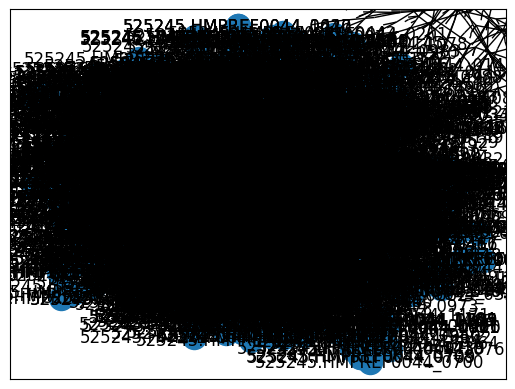

In [35]:
H = nx.minimum_spanning_tree(G0)
#nx.draw(H, pos=nx.spring_layout(H)) 
nx.draw_networkx(H)

In [25]:
print(df.max(axis=0))
df2 = len(df[df["combined_score"] == 775])
print(df2)
#The below code groups the records based on combined score. Equivalent code is select combined_score, count(*) from genestable group by combined_score
df2 = df.combined_score.value_counts()
print(df2)

protein1          525245.HMPREF0044_1545
protein2          525245.HMPREF0044_1545
combined_score                       999
dtype: object
20
161    5806
999    3164
150    2364
151    2036
171    1842
       ... 
780      22
805      22
775      20
836      20
829      20
Name: combined_score, Length: 850, dtype: int64


In [26]:
df3 = df[df["combined_score"] == 775]
df3.shape
df3

,protein1,protein2,combined_score
4722,525245.HMPREF0044_0037,525245.HMPREF0044_0043,775
6028,525245.HMPREF0044_0043,525245.HMPREF0044_0037,775
13437,525245.HMPREF0044_0096,525245.HMPREF0044_0097,775
13688,525245.HMPREF0044_0097,525245.HMPREF0044_0096,775
46896,525245.HMPREF0044_0388,525245.HMPREF0044_1234,775
64215,525245.HMPREF0044_0471,525245.HMPREF0044_0474,775
64468,525245.HMPREF0044_0472,525245.HMPREF0044_0474,775
64763,525245.HMPREF0044_0474,525245.HMPREF0044_0471,775
64771,525245.HMPREF0044_0474,525245.HMPREF0044_0472,775
76822,525245.HMPREF0044_0564,525245.HMPREF0044_0565,775


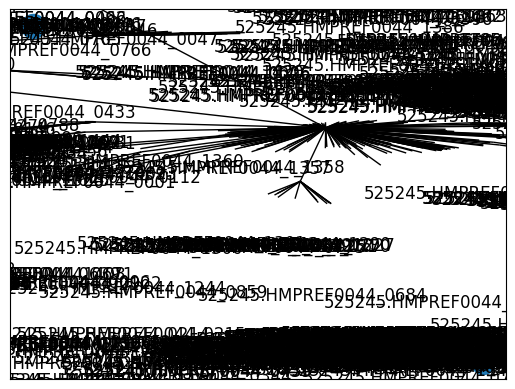

In [27]:
H = nx.minimum_spanning_tree(G0, weight=775)
#nx.draw(H, pos=nx.spring_layout(H)) 
nx.draw_networkx(H, nodelist=('525245.HMPREF0044_0037', '525245.HMPREF0044_0043'))

In [40]:
#diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
#print(diameter)
#nx.is_connected(G)
#connected_components(G)
dia = nx.diameter(G0) 

In [41]:
print(dia)

5


In [43]:
import networkx as nx
from networkx.algorithms.distance_measures import center
c = center(G0)

In [45]:
print(c)

['525245.HMPREF0044_1224', '525245.HMPREF0044_0084', '525245.HMPREF0044_0281', '525245.HMPREF0044_0143', '525245.HMPREF0044_1465', '525245.HMPREF0044_0732', '525245.HMPREF0044_0054', '525245.HMPREF0044_0969', '525245.HMPREF0044_0535', '525245.HMPREF0044_0663', '525245.HMPREF0044_0158', '525245.HMPREF0044_0569', '525245.HMPREF0044_0231', '525245.HMPREF0044_0013', '525245.HMPREF0044_1052', '525245.HMPREF0044_0575', '525245.HMPREF0044_0047', '525245.HMPREF0044_1427', '525245.HMPREF0044_0841', '525245.HMPREF0044_0619', '525245.HMPREF0044_0160', '525245.HMPREF0044_0618', '525245.HMPREF0044_0067', '525245.HMPREF0044_1194', '525245.HMPREF0044_1072', '525245.HMPREF0044_0006', '525245.HMPREF0044_0215', '525245.HMPREF0044_0851', '525245.HMPREF0044_0804', '525245.HMPREF0044_0470', '525245.HMPREF0044_0246', '525245.HMPREF0044_0903', '525245.HMPREF0044_0234', '525245.HMPREF0044_1382', '525245.HMPREF0044_1098', '525245.HMPREF0044_0693', '525245.HMPREF0044_1109', '525245.HMPREF0044_1513', '525245.HMP

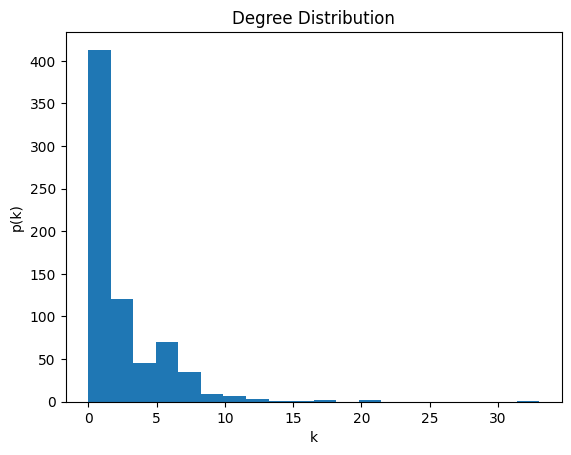

In [50]:
def plot_degree_dist(G):
    degree_hist = nx.degree_histogram(G) 
    degree_hist = np.array(degree_hist, dtype=float)
    degree_prob = degree_hist/G.number_of_nodes()
    #plt.loglog(np.arange(degree_prob.shape[0]),degree_prob,'b.')
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.title('Degree Distribution')
    plt.hist(degree_hist, bins=20)
    plt.show()

plot_degree_dist(G)

In [ ]:
# This is just a guideline.
# Please use seperate cells to perfom the required tasks


#===========================================
# Compute number of nodes, number of edges 
# and the average degree of the network "g"
#===========================================
# YOUR CODE HERE

#===========================================
# Compute the density of 
#===========================================
# YOUR CODE HERE

#===========================================
# Compute the minimum spanning tree in the 
# network "g" and draw it.
#===========================================
# YOUR CODE HERE

#===========================================
# Draw the degree distribution histogram.
#===========================================
# YOUR CODE HERE

#===========================================
# Compute largest connected component (LC) 
# of the network "g"
#===========================================
# YOUR CODE HERE

#===========================================
# List the components in the network "g"
#===========================================
# YOUR CODE HERE

#===========================================
# Get the SubGraph
#===========================================
# YOUR CODE HERE

### Exercise 3  (3 points): Centrality Feature Extraction

Compute the Centralities

The reason we need centralities is already established in the introduction. We are generating features for the network data to transform the network data into a Machine-learning features.

For specific information, click the link adjacent to the name, or for a full list click [here](https://networkx.org/documentation/stable/reference/algorithms/centrality.html#reaching).


In the graph/network analysis, centrality measures are vital tools for understanding the networks in detail.

These algorithms use graph theory to calculate the importance of any given node in a network. They cut through noisy data, revealing parts of the network that need attention – but they all work differently. Each measure has its own definition of 'importance'. There are plenty of parameters.
However, the following network metrics are used in the paper.



1. **closeness centrality** [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality) {**has been provided as an example with code in the next cell**},
2. betweenness centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality),
3. degree centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality),
4. eigenvector centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality),
5. subgraph centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.subgraph_centrality.html#networkx.algorithms.centrality.subgraph_centrality),
8. load centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.load_centrality.html#networkx.algorithms.centrality.load_centrality),
9. harmonic centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.harmonic_centrality.html#networkx.algorithms.centrality.harmonic_centrality),
10. reaching (local) centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.local_reaching_centrality.html#networkx.algorithms.centrality.local_reaching_centrality),
11. pagerank [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html),
12. clustering coefficient [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering),
13. average_neighbor_degree [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.average_neighbor_degree.html)

**Note**: 

- Most of the methods mentioned above return a dictionary ( key-value pairs of node_name: value)

- Some of the methods mentioned above return only 1 number, So make sure to look into the documentation as to what it returns. In that case run the method for each node to create a dictionary of node-names and its values.

In [ ]:
# closeness centrality
centrality_closeness = nx.closeness_centrality(g)

df_centrality_closeness = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_closeness"])
df_centrality_closeness["protein1"] = list(centrality_closeness.keys())
df_centrality_closeness["centrality_closeness"] = list(centrality_closeness.values())
df_centrality_closeness = df_centrality_closeness.set_index("protein1")
df_centrality_closeness.head(2)

NameError: ignored

In [51]:
centrality_closeness = nx.closeness_centrality(G)

df_centrality_closeness = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_closeness"])
df_centrality_closeness["protein1"] = list(centrality_closeness.keys())
df_centrality_closeness["centrality_closeness"] = list(centrality_closeness.values())
df_centrality_closeness = df_centrality_closeness.set_index("protein1")
df_centrality_closeness.head(2)

,centrality_closeness
protein1,
525245.HMPREF0044_0001,0.413738
525245.HMPREF0044_1430,0.405917


In [52]:
# betweenness centrality

centrality_betweeness = nx.betweenness_centrality(G,weight="weight")

df_centrality_betweeness = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_betweeness"])
df_centrality_betweeness["protein1"] = list(centrality_betweeness.keys())
df_centrality_betweeness["centrality_betweeness"] = list(centrality_betweeness.values())
df_centrality_betweeness = df_centrality_betweeness.set_index("protein1")
df_centrality_betweeness.head(2)

,centrality_betweeness
protein1,
525245.HMPREF0044_0001,0.000047
525245.HMPREF0044_1430,0.000057


In [53]:
# degree centrality

centrality_degree=nx.degree_centrality(G)
df_centrality_degree = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_degree"])
df_centrality_degree["protein1"] = list(centrality_degree.keys())
df_centrality_degree["centrality_degree"] = list(centrality_degree.values())
df_centrality_degree = df_centrality_degree.set_index("protein1")
df_centrality_degree.head(2)

,centrality_degree
protein1,
525245.HMPREF0044_0001,0.008502
525245.HMPREF0044_1430,0.011118


In [54]:
# eigenvector centrality

centrality_eigenvector=nx.eigenvector_centrality(G,weight="weight")
df_centrality_eigenvector = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_eigenvector"])
df_centrality_eigenvector["protein1"] = list(centrality_eigenvector.keys())
df_centrality_eigenvector["centrality_eigenvector"] = list(centrality_eigenvector.values())
df_centrality_eigenvector = df_centrality_eigenvector.set_index("protein1")
df_centrality_eigenvector.head(2)

,centrality_eigenvector
protein1,
525245.HMPREF0044_0001,0.000278
525245.HMPREF0044_1430,0.000163


In [55]:
# subgraph centrality

centrality_subgraph=nx.subgraph_centrality(G)
df_centrality_subgraph = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_subgraph"])
df_centrality_subgraph["protein1"] = list(centrality_subgraph.keys())
df_centrality_subgraph["centrality_subgraph"] = list(centrality_subgraph.values())
df_centrality_subgraph = df_centrality_subgraph.set_index("protein1")
df_centrality_subgraph.head(2)

,centrality_subgraph
protein1,
525245.HMPREF0044_0001,5.103081e+98
525245.HMPREF0044_1430,1.996218e+98


In [66]:
# information centrality
for i in H:
  centrality_information=nx.information_centrality(i,weight="weight")
  df_centrality_information = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_information"])
  df_centrality_information["protein1"] = list(centrality_information.keys())
  df_centrality_information["centrality_information"] = list(centrality_information.values())
  df_centrality_information = df_centrality_information.set_index("protein1")
  df_centrality_information.head(2)

AttributeError: ignored

In [61]:
# random-walk centrality

centrality_subgraph=nx.edge_current_flow_betweenness_centrality(G)
df_centrality_subgraph = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_subgraph"])
df_centrality_subgraph["protein1"] = list(centrality_subgraph.keys())
df_centrality_subgraph["centrality_subgraph"] = list(centrality_subgraph.values())
df_centrality_subgraph = df_centrality_subgraph.set_index("protein1")
df_centrality_subgraph.head(2)

NetworkXError: ignored

In [63]:
# load centrality

centrality_load=nx.load_centrality(G,weight="weight")
df_centrality_load = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_load"])
df_centrality_load["protein1"] = list(centrality_load.keys())
df_centrality_load["centrality_load"] = list(centrality_load.values())
df_centrality_load = df_centrality_load.set_index("protein1")
df_centrality_load.head(2)

,centrality_load
protein1,
525245.HMPREF0044_0001,0.000047
525245.HMPREF0044_1430,0.000057


In [64]:
# harmonic centrality

centrality_harmonic=nx.harmonic_centrality(G)
df_centrality_harmonic = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_harmonic"])
df_centrality_harmonic["protein1"] = list(centrality_harmonic.keys())
df_centrality_harmonic["centrality_harmonic"] = list(centrality_harmonic.values())
df_centrality_harmonic = df_centrality_harmonic.set_index("protein1")
df_centrality_harmonic.head(2)

,centrality_harmonic
protein1,
525245.HMPREF0044_0001,662.833333
525245.HMPREF0044_1430,652.500000


In [70]:
# local reaching centrality
uniq_protein1 = df.protein1.unique()
clr=list()
for protein in uniq_protein1:
  temp=nx.local_reaching_centrality(G,protein,weight="weight")
  clr.append(temp)
df_centrality_local_reaching = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]),
                                            columns=["protein1", "centrality_local_reaching"])
df_centrality_local_reaching["protein1"] = uniq_protein1
df_centrality_local_reaching["centrality_local_reaching"] = clr
df_centrality_local_reaching = df_centrality_local_reaching.set_index("protein1")
df_centrality_local_reaching.head(2)


,centrality_local_reaching
protein1,
525245.HMPREF0044_0001,1.689366
525245.HMPREF0044_0002,2.100783


In [69]:
# pagerank

centrality_pagerank=nx.pagerank(G, alpha=0.9,weight="weight")
df_centrality_pagerank = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_pagerank"])
df_centrality_pagerank["protein1"] = list(centrality_pagerank.keys())
df_centrality_pagerank["centrality_pagerank"] = list(centrality_pagerank.values())
df_centrality_pagerank = df_centrality_pagerank.set_index("protein1")
df_centrality_pagerank.head(2)

,centrality_pagerank
protein1,
525245.HMPREF0044_0001,0.000116
525245.HMPREF0044_1430,0.000142


In [71]:
# clustering coefficient

centrality_clustering=nx.clustering(G,weight="weight")
df_centrality_clustering = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_clustering"])
df_centrality_clustering["protein1"] = list(centrality_clustering.keys())
df_centrality_clustering["centrality_clustering"] = list(centrality_clustering.values())
df_centrality_clustering = df_centrality_clustering.set_index("protein1")
df_centrality_clustering.head(2)

,centrality_clustering
protein1,
525245.HMPREF0044_0001,0.03977
525245.HMPREF0044_1430,0.04477


In [72]:
# average_neighbor_degree

centrality_average_neighbor_degree=nx.average_neighbor_degree(G,weight="weight")
df_centrality_average_neighbor_degree = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), 
                                        columns=["protein1", "centrality_average_neighbor_degree"])
df_centrality_average_neighbor_degree["protein1"] = list(centrality_average_neighbor_degree.keys())
df_centrality_average_neighbor_degree["centrality_average_neighbor_degree"] = list(centrality_average_neighbor_degree.values())
df_centrality_average_neighbor_degree = df_centrality_average_neighbor_degree.set_index("protein1")
df_centrality_average_neighbor_degree.head(2)

,centrality_average_neighbor_degree
protein1,
525245.HMPREF0044_0001,133.056501
525245.HMPREF0044_1430,77.105947


### Exercise 4 (2 points): Feature Engineering and Data Preparation

 - Add the above computed values as new columns to the existing dataframe to form new features for machine learning. 
 - Remove the columns *protein2* and the *combined_score*
 - Check for the null values. Drop if any
 - Scale the values of each column
 - Check for correlations of every feature with every other using `seaborn`'s **annotated heatmap**. Drop one of the features in the pair which exhibits a high correlation coefficient, *i.e.* $r>0.9$

In [75]:
#Add the above computed values as new columns to the existing dataframe to form new features for machine learning.
new_df=pd.DataFrame(data = np.zeros([n_uniq_protein1,1]),
                  columns=["protein1"])
new_df["protein1"] = uniq_protein1
new_df.head()
new_df=new_df.merge(df_centrality_average_neighbor_degree, on = "protein1")
new_df=new_df.merge(df_centrality_clustering,on = "protein1")
new_df=new_df.merge(df_centrality_pagerank,on = "protein1")
new_df=new_df.merge(df_centrality_local_reaching,on = "protein1")
new_df=new_df.merge(df_centrality_harmonic,on = "protein1")
new_df=new_df.merge(df_centrality_load,on = "protein1")
new_df=new_df.merge(df_centrality_subgraph,on = "protein1")
new_df=new_df.merge(df_centrality_eigenvector,on = "protein1")
new_df=new_df.merge(df_centrality_degree,on = "protein1")
new_df=new_df.merge(df_centrality_betweeness,on = "protein1")
new_df=new_df.merge(df_centrality_closeness,on = "protein1")
new_df.head()

,protein1,centrality_average_neighbor_degree,centrality_clustering,centrality_pagerank,centrality_local_reaching,centrality_harmonic,centrality_load,centrality_subgraph,centrality_eigenvector,centrality_degree,centrality_betweeness,centrality_closeness
0,525245.HMPREF0044_0001,133.056501,0.039770,0.000116,1.689366,662.833333,0.000047,5.103081e+98,2.781919e-04,0.008502,0.000047,0.413738
1,525245.HMPREF0044_0002,221.526612,0.078736,0.000336,2.100783,780.416667,0.000636,6.424133e+100,4.396284e-03,0.061478,0.000637,0.487074
2,525245.HMPREF0044_0003,234.999768,0.082277,0.000503,2.287058,798.500000,0.000597,9.106193e+100,8.485575e-03,0.079137,0.000598,0.495912
3,525245.HMPREF0044_0004,2.000000,0.000000,0.000456,0.002936,1.500000,0.000000,1.589092e+00,6.753270e-32,0.000654,0.000000,0.000872
4,525245.HMPREF0044_0005,116.288061,0.064736,0.000219,2.033362,721.833333,0.000144,1.859121e+99,6.337157e-04,0.027469,0.000144,0.450438


In [74]:
# Check for the null values. Drop if any

new_df.isnull().sum()

protein1                              0
centrality_average_neighbor_degree    0
centrality_clustering                 0
centrality_pagerank                   0
centrality_local_reaching             0
centrality_harmonic                   0
centrality_load                       0
centrality_subgraph                   0
centrality_eigenvector                0
centrality_degree                     0
centrality_betweeness                 0
centrality_closeness                  0
dtype: int64

In [77]:
# Scale the features

scaler = StandardScaler()

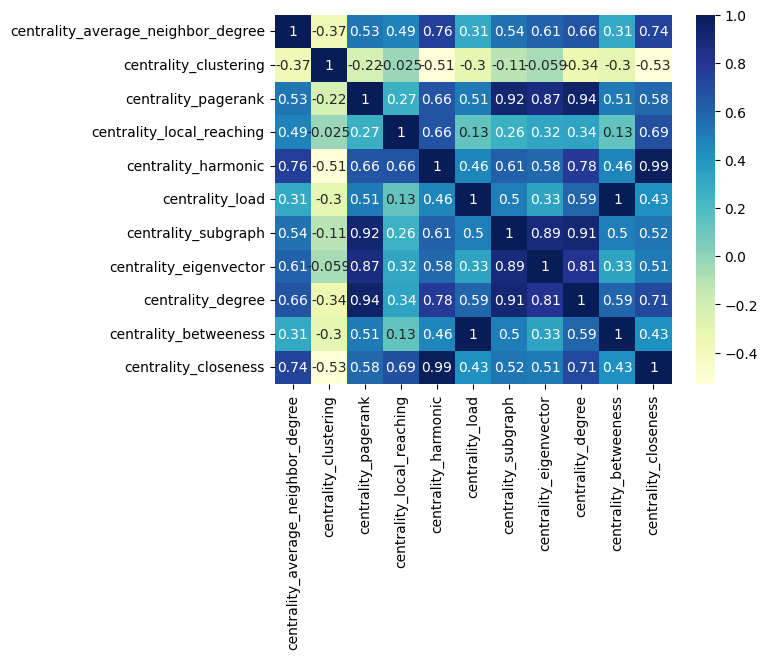

In [78]:
# Display the correlation matrix using Heatmap
new_df[['centrality_average_neighbor_degree',
       'centrality_clustering', 'centrality_pagerank',
       'centrality_local_reaching', 'centrality_harmonic', 'centrality_load',
       'centrality_subgraph', 'centrality_eigenvector', 'centrality_degree',
       'centrality_betweeness', 'centrality_closeness']]= scaler.fit_transform(new_df[['centrality_average_neighbor_degree',
       'centrality_clustering', 'centrality_pagerank',
       'centrality_local_reaching', 'centrality_harmonic', 'centrality_load',
       'centrality_subgraph', 'centrality_eigenvector', 'centrality_degree',
       'centrality_betweeness', 'centrality_closeness']])
dataplot = sns.heatmap(new_df[['centrality_average_neighbor_degree',
       'centrality_clustering', 'centrality_pagerank',
       'centrality_local_reaching', 'centrality_harmonic', 'centrality_load',
       'centrality_subgraph', 'centrality_eigenvector', 'centrality_degree',
       'centrality_betweeness', 'centrality_closeness']].corr(), cmap="YlGnBu", annot=True)
plt.show()




In [79]:
# Drop Highly Correlating Pairs of features


cor_matrix = new_df[['centrality_average_neighbor_degree',
       'centrality_clustering', 'centrality_pagerank',
       'centrality_local_reaching', 'centrality_harmonic', 'centrality_load',
       'centrality_subgraph', 'centrality_eigenvector', 'centrality_degree',
       'centrality_betweeness', 'centrality_closeness']].corr().abs()
# print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
# print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(to_drop)

['centrality_subgraph', 'centrality_degree', 'centrality_betweeness', 'centrality_closeness']


In [82]:
df_md=new_df.drop(columns=to_drop)
print(df_md.head(5))
df_md.shape

                 protein1  centrality_average_neighbor_degree  \
0  525245.HMPREF0044_0001                           -1.062829   
1  525245.HMPREF0044_0002                            0.314354   
2  525245.HMPREF0044_0003                            0.524086   
3  525245.HMPREF0044_0004                           -3.102939   
4  525245.HMPREF0044_0005                           -1.323857   

   centrality_clustering  centrality_pagerank  centrality_local_reaching  \
0              -0.836390            -1.097192                  -1.894261   
1              -0.553866            -0.647628                  -0.302312   
2              -0.528194            -0.307414                   0.418467   
3              -1.124742            -0.402078                  -8.419782   
4              -0.655371            -0.885284                  -0.563193   

   centrality_harmonic  centrality_load  centrality_eigenvector  
0            -0.900101        -0.753289               -0.720847  
1             0.0589

(1530, 8)

### Excerice 5 (1 Point) : Target Data

Obtain the Target Data from the file **"Actinomyces coleocanis.csv"**

In [80]:
df_target = pd.read_csv( "Actinomyces_coleocanis_Essential_Genes.csv")
print(df_target.shape)
df_target.head(3)

(80, 4)


,protein1,gene_name,description,confidence_score
0,525245.HMPREF0044_0021,rpsR,30S ribosomal protein S18,98.5
1,525245.HMPREF0044_0543,rpmA,50S ribosomal protein L27,98.5
2,525245.HMPREF0044_1323,rpsD,30S ribosomal protein S4,98.4


In [85]:
# Create a list (or a set or numpy array) of Essential Genes from the above DataFrame


In [84]:
# Create a new feature called "gene_essentiality"
# Assign 1 to the protein1 if it is present in the list of essential genes
# This becomes your target variable

unique_protein1 = df_target.protein1.unique()
len(unique_protein1)
df_md["gene_essentiality"]=[1 if x in unique_protein1 else 0 for x in df_md['protein1']]
df_md.head(20)

,protein1,centrality_average_neighbor_degree,centrality_clustering,centrality_pagerank,centrality_local_reaching,centrality_harmonic,centrality_load,centrality_eigenvector,gene_essentiality
0,525245.HMPREF0044_0001,-1.062829,-0.836390,-1.097192,-1.894261,-0.900101,-0.753289,-0.720847,0
1,525245.HMPREF0044_0002,0.314354,-0.553866,-0.647628,-0.302312,0.058924,-0.168921,-0.521000,0
2,525245.HMPREF0044_0003,0.524086,-0.528194,-0.307414,0.418467,0.206414,-0.207578,-0.322550,0
3,525245.HMPREF0044_0004,-3.102939,-1.124742,-0.402078,-8.419782,-6.294021,-0.799522,-0.734348,0
4,525245.HMPREF0044_0005,-1.323857,-0.655371,-0.885284,-0.563193,-0.418890,-0.657006,-0.703594,0
5,525245.HMPREF0044_0006,-0.077543,-0.657690,-0.426823,-0.960071,0.133009,-0.180609,-0.507457,0
6,525245.HMPREF0044_0007,0.264270,-0.562344,-0.212013,-0.002615,0.200976,2.103836,-0.367378,0
7,525245.HMPREF0044_0008,-1.014181,2.926787,-1.169157,-0.827090,-1.916899,-0.799522,-0.729534,0
8,525245.HMPREF0044_0009,0.648587,-0.363388,-0.114391,-0.454387,0.286616,-0.365017,-0.233722,0
9,525245.HMPREF0044_0010,1.085154,-0.435122,-0.274439,0.489329,0.232241,-0.462036,-0.169119,0


In [94]:
df_md["gene_essentiality"].value_counts()

0    1450
1      80
Name: gene_essentiality, dtype: int64

### Exercise 6 (1 point) : Gene Essentiality Classification

Determine the Essential Protein using any of your favourite `sklearn`'s classifier models

- Split the data into training and testing datasets
- Build a model, fit and predict
- Print the classification report, Confusion Matrix and ROC curve

In [87]:
# Train-test split the features and target
from sklearn.metrics import f1_score

x=df_md[['centrality_average_neighbor_degree',
       'centrality_clustering', 'centrality_pagerank',
       'centrality_local_reaching', 'centrality_harmonic', 'centrality_load',
       'centrality_eigenvector']]
y=df_md["gene_essentiality"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)


logistic_regression = LogisticRegression()
# Fit on Train data
logistic_regression.fit(xtrain, ytrain)

# Calculating accuracy on the logistic regression classifier
lr_score = logistic_regression.score(xtest, ytest)
print("Accuracy using the Logistic Regression based classifier: ", lr_score)

# Predict on test data
y_pred = logistic_regression.predict(xtest)

# F1 score calculation
lr_f1_score = f1_score(y_pred, ytest)
print ("F1 Score using the Logistic Regression based classifier: ", lr_f1_score)

Accuracy using the Logistic Regression based classifier:  0.9607843137254902
F1 Score using the Logistic Regression based classifier:  0.25000000000000006


In [ ]:
# Instantiate a model (Classifier)
# YOUR CODE HERE

# Fit on Train data
# YOUR CODE HERE

# Predict on test data
# YOUR CODE HERE

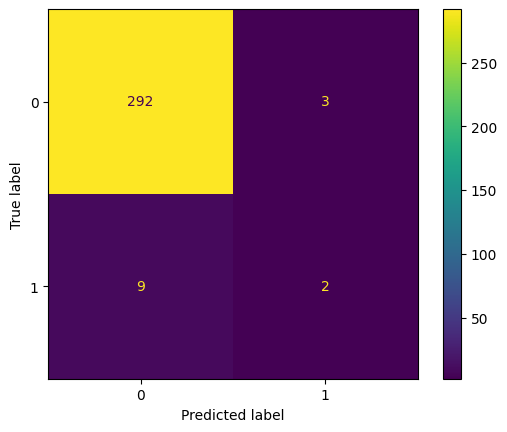

In [90]:
# Print the confusion Matrix
# YOUR CODE HERE
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

cm = confusion_matrix(ytest, y_pred, labels=logistic_regression.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logistic_regression.classes_)
disp.plot()
plt.show()

In [91]:
# Print the classification Report
# YOUR CODE HERE
print(classification_report(ytest, y_pred,target_names=['0','1']))
probs = logistic_regression.predict_proba(xtest)  
probs = probs[:, 1]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       295
           1       0.40      0.18      0.25        11

    accuracy                           0.96       306
   macro avg       0.69      0.59      0.61       306
weighted avg       0.95      0.96      0.95       306



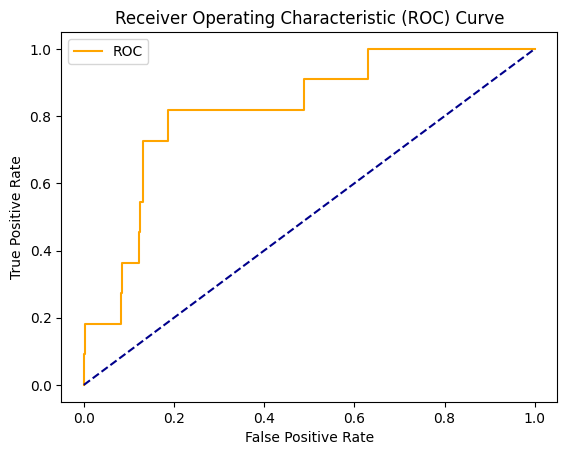

In [93]:
# Plot the ROC Curve
# YOUR CODE HERE
from sklearn.metrics import roc_curve
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fper, tper, thresholds = roc_curve(ytest, probs) 
plot_roc_curve(fper, tper)

#### Discuss your findings and the learning that happened with this mini-project to your Mentor.

## Additional Ungraded Exercise for Practice:

- Try out for other smaller data sets from the [STRING DB LINK](https://string-db.org/cgi/download). Select a species name for example example dog, human, cat etc. It will display the corresponding latin name. Download all the relevant Datasets, explore and use them